In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from datetimerange import DateTimeRange
import seaborn as sns

In [2]:
#Read in 911 Phone Calls - Tornado
calls_tornado = pd.read_csv('../data/911_Phone_Calls_Tornado_030320.csv')
print(calls_tornado.shape)
print(calls_tornado.info())
calls_tornado.head(2)

(475, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    475 non-null    object 
 1   CallTypeId          475 non-null    object 
 2   ALI Latitude        450 non-null    float64
 3   ALI Longitude       450 non-null    float64
 4   Cell Tower Address  468 non-null    object 
dtypes: float64(2), object(3)
memory usage: 18.7+ KB
None


Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0    3/3/2020 0:34  911 Calls     36.072708     -86.665779   
1    3/3/2020 0:36  911 Calls     36.159634     -86.841904   

           Cell Tower Address  
0  620 Richards RD - N Sector  
1      4507D KENTUCKY AV - SE

In [3]:
#rename column names
calls_tornado = calls_tornado.rename(columns = {'Seizure DateTime': 'date_time', 'CallTypeId': 'call_id', 'ALI Latitude': 'lat', 'ALI Longitude': 'lng', 'Cell Tower Address': 'cell_tower_address'})

In [4]:
#calls_tornado.head(1)

In [5]:
#create geometry column
calls_tornado['geometry'] = calls_tornado.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
#drop null values so we can plot points on map
calls_tornado = calls_tornado.dropna()

In [6]:
#raed in Tornado Dispatch Incidents
incidents_tornado = pd.read_csv('../data/Computer Aided Dispatch Data_Tornado Incidents 030320.csv', skiprows =3)
print(incidents_tornado.shape)
print(incidents_tornado.info())
incidents_tornado.head(2)

(260, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              260 non-null    object 
 1   Location                  260 non-null    object 
 2   Latitude1                 260 non-null    float64
 3   Longitude1                260 non-null    float64
 4   IncidentTypeDescription1  260 non-null    object 
dtypes: float64(2), object(3)
memory usage: 10.3+ KB
None


IncidentDate                  Location  Latitude1  Longitude1  \
0  3/3/2020 12:36:34 AM   6205 COCKRILL BEND CIR   36.182002  -86.894052   
1  3/3/2020 12:37:24 AM  7337 COCKRILL BEND BLVD   36.175666  -86.894978   

                      IncidentTypeDescription1  
0  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  
1  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD

In [7]:
#rename columns
incidents_tornado = incidents_tornado.rename(columns = {'IncidentDate': 'date_time', 'Location':'location', 'Latitude1': 'lat', 'Longitude1': 'lng', 'IncidentTypeDescription1': 'incident_description'})

In [8]:
#incidents_tornado.head(2)

In [9]:
#create geometry column
incidents_tornado['geometry'] = incidents_tornado.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
incidents_tornado.head(2)

date_time                  location        lat        lng  \
0  3/3/2020 12:36:34 AM   6205 COCKRILL BEND CIR   36.182002 -86.894052   
1  3/3/2020 12:37:24 AM  7337 COCKRILL BEND BLVD   36.175666 -86.894978   

                          incident_description  \
0  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD   
1  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD   

                               geometry  
0      POINT (-86.89405212 36.18200191)  
1  POINT (-86.89497756999999 36.175666)

In [10]:
#read in 911 Calls - Derecho
calls_derecho = pd.read_csv('../data/911_Phone Calls_Derecho_050320 050420.csv')
print(calls_derecho.shape)
print(calls_derecho.info())
calls_derecho.head(2)

(1549, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Seizure DateTime    1549 non-null   object 
 1   CallTypeId          1549 non-null   object 
 2   ALI Latitude        1483 non-null   float64
 3   ALI Longitude       1483 non-null   float64
 4   Cell Tower Address  1525 non-null   object 
dtypes: float64(2), object(3)
memory usage: 60.6+ KB
None


Seizure DateTime CallTypeId  ALI Latitude  ALI Longitude  \
0   5/3/2020 16:30  911 Calls     36.247802     -86.716847   
1   5/3/2020 16:30  911 Calls     36.143108     -86.800621   

    Cell Tower Address  
0      WIRELESS CALLER  
1  1161 21ST AV S - SE

In [11]:
#rename columns
calls_derecho = calls_derecho.rename(columns = {'Seizure DateTime': 'date_time', 'CallTypeId': 'call_id', 'ALI Latitude': 'lat', 'ALI Longitude': 'lng', 'Cell Tower Address': 'tower_address' })

In [12]:
#calls_derecho.head(1)

In [13]:
#create geometry column
calls_derecho['geometry'] = calls_derecho.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
calls_derecho.head(2)

date_time    call_id        lat        lng        tower_address  \
0  5/3/2020 16:30  911 Calls  36.247802 -86.716847      WIRELESS CALLER   
1  5/3/2020 16:30  911 Calls  36.143108 -86.800621  1161 21ST AV S - SE   

                                       geometry  
0                  POINT (-86.716847 36.247802)  
1  POINT (-86.80062099999999 36.14310800000001)

In [14]:
#read in Derecho Dispatch Incidents
incidents_derecho = pd.read_csv('../data/Computer Aided Dispatch Data_Derecho Incidents 050320-050420.csv', skiprows=3)
print(incidents_derecho.shape)
print(incidents_derecho.info())
incidents_derecho.head(2)

(627, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IncidentDate              627 non-null    object 
 1   Location                  627 non-null    object 
 2   Latitude1                 627 non-null    float64
 3   Longitude1                627 non-null    float64
 4   IncidentTypeDescription1  627 non-null    object 
dtypes: float64(2), object(3)
memory usage: 24.6+ KB
None


IncidentDate          Location  Latitude1  Longitude1  \
0  5/3/2020 4:31:07 PM  901 KENWICK CT W  36.046877  -86.962526   
1  5/3/2020 4:32:18 PM     8036 ARBOR DR  36.082491  -86.940680   

  IncidentTypeDescription1  
0        ELECTRICAL HAZARD  
1        ELECTRICAL HAZARD

In [15]:
#renme columns
incidents_derecho = incidents_derecho.rename(columns = {'IncidentDate':'date_time', 'Location': 'location', 'Latitude1':'lat', 'Longitude1': 'lng', 'IncidentTypeDescription1': 'incident_description'})

In [16]:
#incidents_derecho.head(1)

In [17]:
#create geometry column
incidents_derecho['geometry'] = incidents_derecho.apply(lambda x: Point((float(x.lng), 
                                                         float(x.lat))), 
                                        axis=1)
incidents_derecho.head(2)

date_time          location        lat        lng  \
0  5/3/2020 4:31:07 PM  901 KENWICK CT W  36.046877 -86.962526   
1  5/3/2020 4:32:18 PM     8036 ARBOR DR  36.082491 -86.940680   

  incident_description                          geometry  
0    ELECTRICAL HAZARD  POINT (-86.96252641 36.04687715)  
1    ELECTRICAL HAZARD  POINT (-86.94067952 36.08249081)

#### Value Count EDA

In [18]:
incidents_derecho.incident_description.value_counts()

ELECTRICAL HAZARD                                               370
GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD                      23
MVA INJURIES:                                                     8
SMALL BUILDING INVESTIGATION                                      6
UNKNOWN STATUS:                                                   6
                                                               ... 
RESIDENTIAL FIRE PERSON TRAPPED                                   1
APARTMENT FIRE                                                    1
OUTSIDE NATURAL GAS LEAK RESIDENTIAL LINR   TANK LESS 5 GALL      1
PULL STATION ALARM HOUSE                                          1
CHEST PAIN - HEART ATTACK OR ANGINA HISTORY                       1
Name: incident_description, Length: 122, dtype: int64

In [19]:
incidents_tornado.incident_description.value_counts()

GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD    27
OUTSIDE ODOR                                   26
WIRES DOWN WITH NO SMOKE OR ARCING             17
SMALL BUILDING INVESTIGATION                   15
ELECTRICAL HAZARD WITH OR NEAR WATER           12
                                               ..
STANDING: SITTING: MOVING OR TALKING            1
INSIDE FUEL ODOR                                1
POSSIBLY DANGEROUS HEMORRHAGE TRAUMA            1
ODOR OF SMOKE OUTSIDE                           1
ELECTRICAL INVESTIGATION UNKNOWN SITUATION      1
Name: incident_description, Length: 90, dtype: int64

In [20]:
calls_derecho.call_id.value_counts()

911 Calls    1549
Name: call_id, dtype: int64

In [21]:
#read in zipcodes boundaries file
zipcodes = gpd.read_file('../data/zipcodes.geojson')
zipcodes.head(2)

zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...

In [22]:
#creating geo data frames
calls_tornado_geo = gpd.GeoDataFrame(calls_tornado, 
                           crs = zipcodes.crs, 
                           geometry = calls_tornado['geometry'])

calls_derecho_geo = gpd.GeoDataFrame(calls_derecho, 
                                crs = zipcodes.crs,
                                geometry = calls_derecho['geometry'])

incidents_tornado_geo = gpd.GeoDataFrame(incidents_tornado, 
                                    crs = zipcodes.crs, 
                                    geometry = incidents_tornado['geometry'])

incidents_derecho_geo = gpd.GeoDataFrame(incidents_derecho, 
                                     crs = zipcodes.crs,
                                     geometry = incidents_derecho['geometry'])

In [23]:
#join tornado calls with zipcodes
calls_tornado_zip = gpd.sjoin(calls_tornado_geo, zipcodes, op = 'within')

In [24]:
#join tornado dispatch incidents with zipcodes
incidents_tornado_zip = gpd.sjoin(incidents_tornado_geo, zipcodes, op = 'within')

In [25]:
calls_derecho_zip = gpd.sjoin(calls_derecho_geo, zipcodes, op = 'within')

In [26]:
incidents_derecho_zip = gpd.sjoin(incidents_derecho_geo, zipcodes, op = 'within')

In [27]:
calls_tornado_zip.zip.value_counts()

37206    90
37208    80
37076    56
37214    32
37207    30
37209    24
37013    17
37203    14
37201    12
37115    12
37219     9
37210     8
37189     7
37217     7
37213     6
37211     5
37215     4
37072     3
37221     3
37216     3
37205     2
37218     2
37212     2
37138     2
37204     1
37232     1
37080     1
37228     1
Name: zip, dtype: int64

In [28]:
incidents_tornado_zip.zip.value_counts()

37206    72
37208    59
37076    37
37214    27
37209    14
37207     7
37201     7
37115     6
37213     5
37219     5
37218     5
37205     3
37216     2
37210     2
37211     2
37203     2
37080     1
37138     1
37228     1
37217     1
37013     1
Name: zip, dtype: int64

In [29]:
tornado_zipcodes = ['37214', '37206', '37208', '37209', '37076', '37201', '37213', '37218'] #'37207'

In [30]:
calls_derecho_zip.zip.value_counts()

37211    194
37013    191
37076    123
37205    100
37214     89
37217     73
37215     71
37209     68
37204     58
37207     55
37115     52
37210     51
37221     43
37220     39
37212     38
37203     33
37208     29
37206     27
37027     20
37216     20
37138     18
37218     10
37189      6
37080      4
37072      3
37232      3
37219      3
37213      2
37122      1
37201      1
Name: zip, dtype: int64

In [31]:
incidents_derecho_zip.zip.value_counts()

37211    79
37076    61
37205    57
37013    56
37214    37
37215    34
37204    29
37221    27
37217    27
37210    26
37212    25
37209    25
37207    20
37203    20
37220    19
37115    15
37216    12
37208    12
37206     9
37027     8
37138     6
37218     6
37072     5
37080     3
37228     2
37201     1
37219     1
37232     1
37189     1
37143     1
Name: zip, dtype: int64

In [32]:
#create map centered in Nashville
nash_map = folium.Map(location = [36.16784, -86.77816], zoom_start = 10, scrollWheelZoom=False)
#add zipcode boundaries
folium.GeoJson(zipcodes['geometry'], tooltip = zip).add_to(nash_map)
#add popup points for tornado dispatch incidents
for row_index, row_values in incidents_tornado.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['incident_description'])
    icon=folium.Icon(color= 'red', icon = 'point', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon).add_to(nash_map)
#add popup points for tornado 911 calls   
for row_index, row_values in calls_tornado.iterrows(): 
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['lat']) + str(row_values['lng'])
    icon=folium.Icon(color= 'orange', icon = 'point', prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon).add_to(nash_map)

In [33]:
#show map 
#nash_map

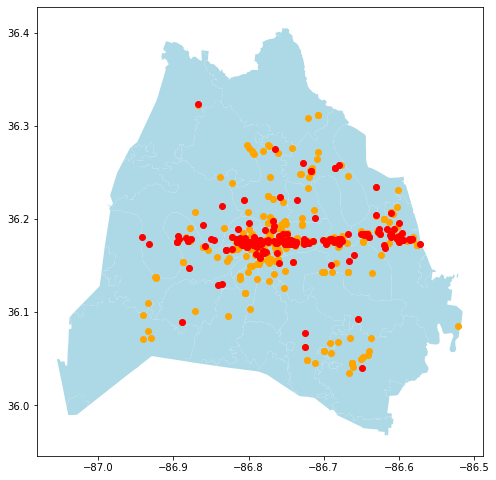

In [34]:
#same map as above
ax = zipcodes.plot(figsize = (8, 10), color = 'lightblue')
calls_tornado_zip.plot( ax = ax, color = 'orange');
incidents_tornado_zip.plot(ax=ax, color = 'red' )
plt.show();

In [35]:
#calls_tornado_zip.po_name.value_counts()

In [36]:
#zipcodes.po_name.value_counts()

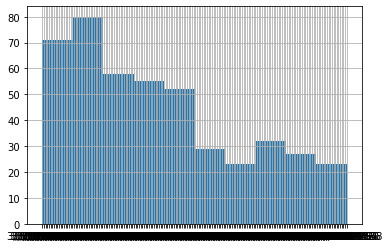

In [37]:
#call time distribution
calls_tornado.date_time.hist()
plt.show()

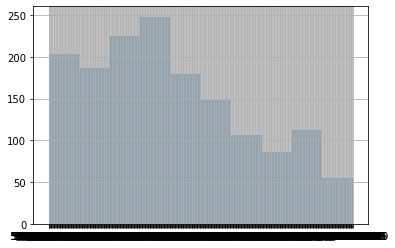

In [38]:
#dispatch incidents distribution
calls_derecho.date_time.hist()
plt.show()

## Exploring and Plotting Tornado Data

In [39]:
#read in file that contains the path and strength of the tornado
tornado = pd.read_csv('../data/tornado.csv')
tornado.head(2)
tornado.shape

(1013, 4)

In [40]:
#create geometry column
tornado['geometry'] = tornado.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [41]:
#make tornado a geo data frame
tornado_geo = gpd.GeoDataFrame(tornado, 
                                     crs = zipcodes.crs,
                                     geometry = tornado['geometry'])

In [42]:
tornado_geo_zipcodes = gpd.sjoin(tornado_geo, zipcodes, op = 'within')

In [43]:
tornado_geo.shape

(1013, 5)

In [44]:
#add a type column to distinguish the points on the map
calls_tornado['type'] = ('911 call')
calls_tornado.head(1)

date_time    call_id        lat        lng          cell_tower_address  \
0  3/3/2020 0:34  911 Calls  36.072708 -86.665779  620 Richards RD - N Sector   

                     geometry      type  
0  POINT (-86.66578 36.07271)  911 call

In [45]:
#add a type column to distinguish the points on the map
incidents_tornado['type'] = ('dispatch')
incidents_tornado.head(1)

date_time                 location        lat        lng  \
0  3/3/2020 12:36:34 AM  6205 COCKRILL BEND CIR   36.182002 -86.894052   

                          incident_description                    geometry  \
0  GENERAL ALARM COMMERCIAL   INDUSTRIAL BUILD  POINT (-86.89405 36.18200)   

       type  
0  dispatch

In [46]:
#combined data frames to plot on map
combined_tornados = pd.concat([calls_tornado, incidents_tornado])

In [47]:
#combined_tornados.tail()

## Setting up and plottting the tornado path, calls, and dispatches

In [48]:
tornado_force = ['EF5', 'EF4', 'EF3', 'EF2'] # here I define the strength I want to plot
tornado_lat_low = 36.168 # this is the geographic latitude range
tornado_lat_high = 36.188
#now keep only the records where strength is greater than EF1
tornado = tornado.loc[tornado['EF_Scale'].isin(tornado_force)]
#tornado.shape
tornado.shape

(408, 5)

In [49]:
map_tornado = folium.Map(location = [36.173, -86.78], zoom_start = 13.2, tiles = 'Stamen Terrain',
    scrollWheelZoom=False)
folium.GeoJson(zipcodes['geometry']).add_to(map_tornado)
    #tiles = 'Stamen Toner' is nice - try 'Stamen Terrain' also 'Mapbox Control Room' 'mapquestopen' 'openstreetmap'
for ind, row in combined_tornados.iterrows():
    # now try to only filter on those within a certain Longitude
    if row['lat'] <tornado_lat_high and row['lat']> tornado_lat_low:
        point = [row['lat'], row['lng']]
        popup = "Type: " + str(row['type'])+" Time:" + str(row['date_time'])+ ' Address:' + str(row['cell_tower_address'])
        # now color format based on the type
        if row['type'] == "911 call":
            folium.CircleMarker(point, radius=10, popup = popup, fill=True, color='green').add_to(map_tornado)
        if row['type'] == "dispatch":
            folium.CircleMarker(point, radius=10, popup = popup, fill=True, color='darkblue').add_to(map_tornado)
        else:
            folium.CircleMarker(point, radius=10, popup = popup,
            color= 'orange', fill=True, fill_color='lightgreen').add_to(map_tornado)
points_plt=[]
for ind, row in tornado.iterrows():
    point = [row['latitude'], row['longitude']]
    popup = 'Tornado strength ' + str(row['EF_Scale']) + ' at ' + str(row['latitude']) + ": " +str(row['longitude'])
    #now color format based on the strength of the tornado
    if row['EF_Scale']=="EF3":
        folium.Marker(point, popup = popup, icon = folium.Icon(color='darkred', icon='bolt', prefix='fa')).add_to(map_tornado)
    else:
        folium.Marker(point, popup = popup, icon = folium.Icon(color='lightred', icon='bolt', prefix='fa')).add_to(map_tornado)
        points_plt.append(point)

#fg = folium.FeatureGroup("Lines")
#map_tornado.add_child(fg)
#points2 = [(36.168, -85.66578), (36.168, -87.64910)]
folium.PolyLine(locations = points_plt, color="red", weight=5, opacity=1).add_to(map_tornado)
#map_tornado.add_child(folium.map.LayerControl(collapsed = False))
map_tornado

In [50]:
#unhelpful map 
#ax = zipcodes.plot(figsize=(15,10), color = 'lightblue')
#tornado_geo_zipcodes.geometry.plot(ax = ax)
#for index, row in zipcodes.iterrows():
#    plt.annotate(text=row['zip'], 
#                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
#                 horizontalalignment='center', fontweight = 'bold')
#plt.title('Tornado Points', fontsize = 14);

## Add in police incidents

In [51]:
#read in davidson county police incidents from 2020
police_incidents_2020 = pd.read_csv('../data/police_incidents_api.csv')

In [52]:
police_incidents_2020.head()

Unnamed: 0     primary_key  incident_number report_type  \
0           0  20200433636_11      20200433636           T   
1           1  20200433624_11      20200433624           D   
2           2  20200433623_11      20200433623           D   
3           3  20200433622_11      20200433622           W   
4           4  20200433613_11      20200433613           D   

  incident_status_code incident_status_description investigation_status  \
0                    O                        OPEN                 Open   
1                    U                   UNFOUNDED               Closed   
2                    U                   UNFOUNDED               Closed   
3                    U                   UNFOUNDED               Closed   
4                    A           CLEARED BY ARREST               Closed   

         incident_occurred        incident_reported      incident_location  \
0  2020-06-28T19:00:00.000  2020-06-29T14:49:00.000            PATRICIA DR   
1  2020-06-29T13:41:00.000  2020-06-29T14:35:00.000    3000 DICKERSON PIKE   
2  2020-06-29T12:39:00.000  2020-06-29T13:44:00.000  600 MURFREESBORO PIKE   
3  2020-06-29T11:00:00.000  2020-06-29T13:43:00.000       1500 FORREST AVE   
4  2020-06-29T13:11:00.000  2020-06-29T14:15:00.000       2200 TERRACE AVE   

   ...  victim_county_resident  \
0  ...                RESIDENT   
1  ...                RESIDENT   
2  ...                RESIDENT   
3  ...                     NaN   
4  ...                RESIDENT   

                                     mapped_location  \
0  {'type': 'Point', 'coordinates': [-86.71, 36.13]}   
1  {'type': 'Point', 'coordinates': [-86.76, 36.2...   
2  {'type': 'Point', 'coordinates': [-86.742, 36....   
3  {'type': 'Point', 'coordinates': [-86.743, 36....   
4  {'type': 'Point', 'coordinates': [-86.83, 36.1...   

   :@computed_region_wvby_4s8j :@computed_region_3aw5_2wv7  \
0                          1.0                         1.0   
1                          1.0                         1.0   
2                          1.0                         1.0   
3                          1.0                         1.0   
4                          1.0                         1.0   

   :@computed_region_p6sk_2acq :@computed_region_gxvr_9jxz  \
0                          6.0                        22.0   
1                          3.0                        16.0   
2                         18.0                        11.0   
3                         14.0                         4.0   
4                          2.0                        34.0   

  report_type_description zip_code     rpa   zone  
0                     NaN      NaN     NaN    NaN  
1              DISPATCHED  37207.0  1811.0  225.0  
2              DISPATCHED  37210.0  8217.0  513.0  
3                 WITNESS  37206.0  1217.0  213.0  
4              DISPATCHED  37218.0  3115.0  623.0  

[5 rows x 36 columns]

In [53]:
police_incidents_2020.incident_status_description.value_counts()

OPEN                    24330
UNFOUNDED               14940
CLEARED BY ARREST        7043
REFUSED TO COOPERATE     3380
PROSECUTION DECLINED      247
JUVENILE, NO CUSTODY       44
DEATH OF OFFENDER          16
Name: incident_status_description, dtype: int64

In [54]:
police_incidents_2020.columns

Index(['Unnamed: 0', 'primary_key', 'incident_number', 'report_type',
       'incident_status_code', 'incident_status_description',
       'investigation_status', 'incident_occurred', 'incident_reported',
       'incident_location', 'latitude', 'longitude', 'location_code',
       'location_description', 'offense_number', 'offense_nibrs',
       'offense_description', 'weapon_primary', 'weapon_description',
       'victim_number', 'domestic_related', 'victim_type',
       'victim_description', 'victim_gender', 'victim_race',
       'victim_ethnicity', 'victim_county_resident', 'mapped_location',
       ':@computed_region_wvby_4s8j', ':@computed_region_3aw5_2wv7',
       ':@computed_region_p6sk_2acq', ':@computed_region_gxvr_9jxz',
       'report_type_description', 'zip_code', 'rpa', 'zone'],
      dtype='object')

In [55]:
police_incidents_2020.offense_description.value_counts().to_frame().reset_index().head(5)

index  offense_description
0           POLICE INQUIRY                10039
1  BURGLARY- MOTOR VEHICLE                 4057
2             SIMPLE ASSLT                 3309
3    DAMAGE PROP - PRIVATE                 2626
4              SHOPLIFTING                 2304

In [56]:
#seperate date time column, for easier filtering
police_incidents_2020['date_occurred'] = police_incidents_2020['incident_occurred'].str.split('T').str[0] 

In [57]:
#should we convert to datetime?
#police_incidents_2020['incident_reported'] = pd.to_datetime(police_incidents_2020['incident_reported'])
#police_incidents_2020['date_occurred'] = pd.to_date(police_incidents_2020['date_occurred'])

In [58]:
#finding police incidents from February 
police_incidents_pre_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-02')]

In [59]:
#adding in March 1 & 2 and removing February 1 & 2 so we have the month prior to the tornado
police_incidents_pre_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-03-01')].append(police_incidents_pre_tornado)
police_incidents_pre_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-03-02')].append(police_incidents_pre_tornado)
police_incidents_pre_tornado = police_incidents_pre_tornado[~police_incidents_pre_tornado['date_occurred'].str.contains('2020-02-01')]
police_incidents_pre_tornado = police_incidents_pre_tornado[~police_incidents_pre_tornado['date_occurred'].str.contains('2020-02-02')]

In [60]:
police_incidents_pre_tornado.tail()

Unnamed: 0     primary_key  incident_number report_type  \
45075       45075  20200080174_11      20200080174           D   
45076       45076  20200080172_11      20200080172           D   
45077       45077  20200080132_11      20200080132           S   
45079       45079  20200080127_11      20200080127           D   
45081       45081  20200080084_11      20200080084           D   

      incident_status_code incident_status_description investigation_status  \
45075                    U                   UNFOUNDED               Closed   
45076                    U                   UNFOUNDED               Closed   
45077                    A           CLEARED BY ARREST               Closed   
45079                    O                        OPEN                 Open   
45081                    U                   UNFOUNDED               Closed   

             incident_occurred        incident_reported  incident_location  \
45075  2020-02-03T00:30:00.000  2020-02-03T01:45:00.000     200 WALLACE RD   
45076  2020-02-03T01:16:00.000  2020-02-03T02:01:00.000    700 GLENVIEW DR   
45077  2020-02-03T00:35:00.000  2020-02-03T04:00:00.000     0 CENTURY BLVD   
45079  2020-02-03T00:30:00.000  2020-02-03T00:48:00.000       NEW YORK AVE   
45081  2020-02-03T00:00:00.000  2020-02-03T01:23:00.000  4800 TERRAGON TRL   

       ...                                    mapped_location  \
45075  ...  {'type': 'Point', 'coordinates': [-86.703, 36....   
45076  ...  {'type': 'Point', 'coordinates': [-86.754, 36....   
45077  ...  {'type': 'Point', 'coordinates': [-86.686, 36....   
45079  ...  {'type': 'Point', 'coordinates': [-86.86, 36.17]}   
45081  ...  {'type': 'Point', 'coordinates': [-86.67, 36.0...   

       :@computed_region_wvby_4s8j  :@computed_region_3aw5_2wv7  \
45075                          1.0                          1.0   
45076                          1.0                          1.0   
45077                          1.0                          1.0   
45079                          1.0                          1.0   
45081                          1.0                          1.0   

      :@computed_region_p6sk_2acq  :@computed_region_gxvr_9jxz  \
45075                        28.0                          3.0   
45076                        14.0                          4.0   
45077                         8.0                         38.0   
45079                        24.0                         46.0   
45081                        22.0                         15.0   

      report_type_description zip_code     rpa   zone  date_occurred  
45075              DISPATCHED  37211.0  8707.0  321.0     2020-02-03  
45076              DISPATCHED  37206.0  1027.0  211.0     2020-02-03  
45077                 SUSPECT  37214.0  9115.0  513.0     2020-02-03  
45079              DISPATCHED      NaN     NaN    NaN     2020-02-03  
45081              DISPATCHED  37013.0  8899.0  323.0     2020-02-03  

[5 rows x 37 columns]

In [61]:
#finidng police incidents in March
police_incidents_after_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-03')]

In [62]:
#removing March 1 & 2 and adding in April 1 & 2
police_incidents_after_tornado = police_incidents_after_tornado[~police_incidents_after_tornado['date_occurred'].str.contains('2020-03-01')]
police_incidents_after_tornado = police_incidents_after_tornado[~police_incidents_after_tornado['date_occurred'].str.contains('2020-03-02')]
police_incidents_after_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-04-01')].append(police_incidents_after_tornado)
police_incidents_after_tornado = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-04-02')].append(police_incidents_after_tornado)

In [63]:
police_incidents_after_tornado.sort_values('date_occurred')

Unnamed: 0     primary_key  incident_number report_type  \
35655       35655  20200150858_11      20200150858           D   
26938       26938  20200232255_11      20200232255           D   
35431       35431  20200154303_11      20200154303           D   
35428       35428  20200154393_11      20200154393           D   
35427       35427  20200154413_11      20200154413           D   
...           ...             ...              ...         ...   
26684       26684  20200235000_11      20200235000           D   
26685       26685  20200234982_11      20200234982           D   
26686       26686  20200234960_11      20200234960           D   
26689       26689  20200234949_11      20200234949           D   
9794         9794  20200377674_11      20200377674           T   

      incident_status_code incident_status_description investigation_status  \
35655                    A           CLEARED BY ARREST               Closed   
26938                    O                        OPEN                 Open   
35431                    O                        OPEN                 Open   
35428                    O                        OPEN                 Open   
35427                    O                        OPEN                 Open   
...                    ...                         ...                  ...   
26684                    O                        OPEN                 Open   
26685                    U                   UNFOUNDED               Closed   
26686                    O                        OPEN                 Open   
26689                    U                   UNFOUNDED               Closed   
9794                     O                        OPEN                 Open   

             incident_occurred        incident_reported  \
35655  2020-03-03T00:02:00.000  2020-03-03T01:08:00.000   
26938  2020-03-03T08:00:00.000  2020-04-01T16:28:00.000   
35431  2020-03-03T13:00:00.000  2020-03-04T07:51:00.000   
35428  2020-03-03T09:00:00.000  2020-03-04T07:49:00.000   
35427  2020-03-03T21:00:00.000  2020-03-04T08:41:00.000   
...                        ...                      ...   
26684  2020-04-02T15:00:00.000  2020-04-02T15:26:00.000   
26685  2020-04-02T14:00:00.000  2020-04-02T15:47:00.000   
26686  2020-04-02T12:00:00.000  2020-04-02T14:54:00.000   
26689  2020-04-02T15:00:00.000  2020-04-02T16:07:00.000   
9794   2020-04-02T12:00:00.000  2020-05-29T14:40:00.000   

                  incident_location  ...  \
35655         4200 CLARKSVILLE PIKE  ...   
26938                       JADE DR  ...   
35431                    21ST AVE S  ...   
35428                       HWY 100  ...   
35427                 WILD APPLE CT  ...   
...                             ...  ...   
26684                    HARDING PL  ...   
26685  WALDEN WAY & WALDEN WOODS DR  ...   
26686                     COLFAX DR  ...   
26689         5000 CLARKSVILLE PIKE  ...   
9794                  JANEFIELD WAY  ...   

                                         mapped_location  \
35655  {'type': 'Point', 'coordinates': [-86.837, 36....   
26938   {'type': 'Point', 'coordinates': [-86.7, 36.15]}   
35431   {'type': 'Point', 'coordinates': [-86.8, 36.13]}   
35428  {'type': 'Point', 'coordinates': [-87.01, 36.03]}   
35427  {'type': 'Point', 'coordinates': [-86.63, 36.01]}   
...                                                  ...   
26684  {'type': 'Point', 'coordinates': [-86.73, 36.08]}   
26685  {'type': 'Point', 'coordinates': [-86.59, 36.1...   
26686  {'type': 'Point', 'coordinates': [-86.66, 36.15]}   
26689  {'type': 'Point', 'coordinates': [-86.848, 36....   
9794   {'type': 'Point', 'coordinates': [-86.66, 35.98]}   

       :@computed_region_wvby_4s8j  :@computed_region_3aw5_2wv7  \
35655                          1.0                          1.0   
26938                          1.0                          1.0   
35431                          1.0                          1.0   
35428                          1.0    

In [64]:
print(police_incidents_pre_tornado.shape)
police_incidents_pre_tornado.offense_description.value_counts().to_frame().reset_index().head(25)

(9141, 37)


index  offense_description
0                              POLICE INQUIRY                 1769
1                     BURGLARY- MOTOR VEHICLE                  838
2                                SIMPLE ASSLT                  569
3                       DAMAGE PROP - PRIVATE                  458
4                                 SHOPLIFTING                  441
5                              FOUND PROPERTY                  320
6                   RECOVERY, STOLEN PROPERTY                  319
7                               LOST PROPERTY                  263
8                               VEHICLE THEFT                  261
9            WEAPON OFFENSE, CRIMINAL ATTEMPT                  238
10                           LARC - FROM BLDG                  231
11             ASSAULT- FEAR OF BODILY INJURY                  217
12           DRUG PARAPHERNALIA- UNLAWFUL USE                  201
13                                    ROBBERY                  180
14                       BURGLARY- AGGRAVATED                  161
15                      LARC - PARTS FROM VEH                  140
16                                  TRANSPORT                  135
17       POSSESSION OF A CONTROLLED SUBSTANCE                  135
18                            FRAUD - SWINDLE                  134
19         FRAUD -  ILLEG USE OF CREDIT CARDS                  124
20  ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT                  115
21             INTENTIONAL AGGRAVATED ASSAULT                  113
22                        MARIJUANA - POSSESS                  105
23              BURGL - FORCED ENTRY-NONRESID                   70
24                     HARRASSMENT (NUISANCE)                   66

In [65]:
print(police_incidents_after_tornado.shape)
police_incidents_after_tornado.offense_description.value_counts().to_frame().reset_index().head(5)

(9091, 37)


index  offense_description
0           POLICE INQUIRY                 1890
1  BURGLARY- MOTOR VEHICLE                  762
2             SIMPLE ASSLT                  636
3    DAMAGE PROP - PRIVATE                  413
4              SHOPLIFTING                  380

In [66]:
police_incidents_pre_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-04')]

In [67]:
police_incidents_pre_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-05-01')].append(police_incidents_pre_derecho)
police_incidents_pre_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-05-02')].append(police_incidents_pre_derecho)
police_incidents_pre_derecho = police_incidents_pre_derecho[~police_incidents_pre_derecho['date_occurred'].str.contains('2020-04-01')]
police_incidents_pre_derecho = police_incidents_pre_derecho[~police_incidents_pre_derecho['date_occurred'].str.contains('2020-04-02')]

In [68]:
print(police_incidents_pre_derecho.shape)
police_incidents_pre_derecho.offense_description.value_counts().to_frame().reset_index().head()

(8453, 37)


index  offense_description
0           POLICE INQUIRY                 1756
1  BURGLARY- MOTOR VEHICLE                  589
2             SIMPLE ASSLT                  556
3              SHOPLIFTING                  475
4    DAMAGE PROP - PRIVATE                  419

In [69]:
police_incidents_after_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-05')]

In [70]:
police_incidents_after_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-06-01')].append(police_incidents_pre_derecho)
police_incidents_after_derecho = police_incidents_2020[police_incidents_2020['date_occurred'].str.contains('2020-06-02')].append(police_incidents_pre_derecho)
police_incidents_after_derecho = police_incidents_after_derecho[~police_incidents_after_derecho['date_occurred'].str.contains('2020-05-01')]
police_incidents_after_derecho = police_incidents_after_derecho[~police_incidents_after_derecho['date_occurred'].str.contains('2020-05-02')]

In [71]:
print(police_incidents_after_derecho.shape)
police_incidents_after_derecho.offense_description.value_counts().to_frame().reset_index().head(25)

(8144, 37)


index  offense_description
0                                 POLICE INQUIRY                 1683
1                        BURGLARY- MOTOR VEHICLE                  569
2                                   SIMPLE ASSLT                  539
3                                    SHOPLIFTING                  464
4                          DAMAGE PROP - PRIVATE                  415
5                      RECOVERY, STOLEN PROPERTY                  280
6                 ASSAULT- FEAR OF BODILY INJURY                  239
7                                 FOUND PROPERTY                  229
8                                  VEHICLE THEFT                  228
9               WEAPON OFFENSE, CRIMINAL ATTEMPT                  196
10                              LARC - FROM BLDG                  172
11                                     TRANSPORT                  157
12                                 LOST PROPERTY                  146
13                INTENTIONAL AGGRAVATED ASSAULT                  146
14                          BURGLARY- AGGRAVATED                  145
15              DRUG PARAPHERNALIA- UNLAWFUL USE                  143
16     ASSAULT- OFFENSIVE OR PROVOCATIVE CONTACT                  122
17                         LARC - PARTS FROM VEH                  116
18                                       ROBBERY                  115
19                 BURGL - FORCED ENTRY-NONRESID                  113
20                               FRAUD - SWINDLE                  108
21            FRAUD -  ILLEG USE OF CREDIT CARDS                  102
22                        DAMAGE PROP - BUSINESS                   89
23  Assault, Aggravated - Deadly Weapon - Int/Kn                   86
24               THEFT OF PROPERTY- $500 OR LESS                   84

In [72]:
##def extract_date(date)
#keep_dates = []
#for f in police_incidents_2020['incident_occurred']:
#    if f >= '02/1/2020 12:00:01 AM' and f <= '04/3/2020 12:00:01 AM':
#        keep_dates.append(True)
#    else:
#        keep_dates.append(False)
#    #append it to a list

#police_incidents_2020_tornado = police_incidents_2020[police_incidents_2020['tornado_time'] == True]

In [73]:
police_incidents_after_derecho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8144 entries, 2315 to 26700
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   8144 non-null   int64  
 1   primary_key                  8144 non-null   object 
 2   incident_number              8144 non-null   int64  
 3   report_type                  8144 non-null   object 
 4   incident_status_code         8144 non-null   object 
 5   incident_status_description  8144 non-null   object 
 6   investigation_status         8144 non-null   object 
 7   incident_occurred            8144 non-null   object 
 8   incident_reported            8144 non-null   object 
 9   incident_location            8128 non-null   object 
 10  latitude                     8096 non-null   float64
 11  longitude                    8096 non-null   float64
 12  location_code                8144 non-null   float64
 13  location_descr

In [74]:
police_incidents_pre_tornado['geometry'] = police_incidents_pre_tornado.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)
police_incidents_after_tornado['geometry'] = police_incidents_after_tornado.apply(lambda x: Point((float(x.longitude), 
                                                         float(x.latitude))), 
                                        axis=1)

In [75]:
police_incidents_pre_tornado.shape

(9141, 38)

In [76]:
pi_pre_tornado_geo = gpd.GeoDataFrame(police_incidents_pre_tornado, 
                           crs = zipcodes.crs, 
                           geometry = police_incidents_pre_tornado['geometry'])

In [77]:
pre_tornado_incidents_by_zip = gpd.sjoin(pi_pre_tornado_geo, zipcodes, op = 'within')

In [78]:
pre_tornado_incidents_by_zip.groupby('zip').size()

zip
37013    950
37015      3
37027     45
37064      1
37072     62
37076    433
37080     32
37086      3
37115    663
37135      4
37138    130
37143      1
37189     42
37201    252
37203    642
37204    141
37205    111
37206    521
37207    878
37208    471
37209    493
37210    463
37211    876
37212     93
37213     42
37214    463
37215    100
37216    209
37217    406
37218    201
37219     48
37220     30
37221    195
37228     70
37232      2
37240      2
dtype: int64

In [79]:
tornado_by_zipcode = gpd.sjoin(tornado_geo, zipcodes, op = 'within')

In [80]:
tornado_by_zipcode.head()

EF_Scale  longitude  latitude  altitude                    geometry  \
484      EF1  -86.57335  36.17679       3.0  POINT (-86.57335 36.17679)   
485      EF1  -86.58204  36.17833       3.0  POINT (-86.58204 36.17833)   
486      EF1  -86.58497  36.17815       3.0  POINT (-86.58497 36.17815)   
487      EF2  -86.58533  36.17771       4.0  POINT (-86.58533 36.17771)   
488      EF1  -86.58534  36.17749       3.0  POINT (-86.58534 36.17749)   

     index_right    zip objectid    po_name      shape_stlength  \
484           46  37076       53  HERMITAGE  291751.42832600401   
485           46  37076       53  HERMITAGE  291751.42832600401   
486           46  37076       53  HERMITAGE  291751.42832600401   
487           46  37076       53  HERMITAGE  291751.42832600401   
488           46  37076       53  HERMITAGE  291751.42832600401   

           shape_starea  
484  983805973.83410645  
485  983805973.83410645  
486  983805973.83410645  
487  983805973.83410645  
488  983805973.83410645

In [81]:
tornado_points_zipcode_aboveEF1 = tornado_by_zipcode[tornado_by_zipcode['EF_Scale'].isin(['EF1']) == False]
tornado_points_zipcode_aboveEF1.head()

EF_Scale  longitude  latitude  altitude                    geometry  \
487      EF2  -86.58533  36.17771       4.0  POINT (-86.58533 36.17771)   
489      EF2  -86.58550  36.17790       4.0  POINT (-86.58550 36.17790)   
493      EF2  -86.58661  36.17837       4.0  POINT (-86.58661 36.17837)   
497      EF2  -86.60010  36.17998       4.0  POINT (-86.60010 36.17998)   
498      EF2  -86.60023  36.18031       4.0  POINT (-86.60023 36.18031)   

     index_right    zip objectid    po_name      shape_stlength  \
487           46  37076       53  HERMITAGE  291751.42832600401   
489           46  37076       53  HERMITAGE  291751.42832600401   
493           46  37076       53  HERMITAGE  291751.42832600401   
497           46  37076       53  HERMITAGE  291751.42832600401   
498           46  37076       53  HERMITAGE  291751.42832600401   

           shape_starea  
487  983805973.83410645  
489  983805973.83410645  
493  983805973.83410645  
497  983805973.83410645  
498  983805973.83410645

In [82]:
points_tornado_zone = tornado_points_zipcode_aboveEF1[(tornado_points_zipcode_aboveEF1['latitude'] <= 36.188) & (tornado_points_zipcode_aboveEF1['latitude'] >= 36.168)]
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]
#tornado_lat_low = 36.168 # this is the geographic latitude range
#tornado_lat_high = 36.188

In [83]:
points_tornado_zone.min()

EF_Scale                         EF2
longitude                   -86.8965
latitude                     36.1731
altitude                           4
index_right                       12
zip                            37076
objectid                          10
po_name                    HERMITAGE
shape_stlength    165410.80552044208
shape_starea      1001364029.2892456
dtype: object

In [84]:
tornado_points_zip = points_tornado_zone.groupby('zip').size().to_frame().reset_index()

In [85]:
tornado_points_zip.columns = ['zipcodes', 'points']

In [86]:
tornado_points_zip.sort_values(by='points', ascending = False)

zipcodes  points
6    37214      42
2    37206      40
3    37208      36
4    37209      32
0    37076      20
1    37201       4
5    37213       1
7    37218       1

In [87]:
zipcodes.head()

zip objectid    po_name      shape_stlength        shape_starea  \
0  37115        1    MADISON  178783.02488886821  596553400.57885742   
1  37216        3  NASHVILLE  75820.997821400058  188884682.28344727   
2  37204        9  NASHVILLE  93180.292250425613  200664795.51708984   
3  37027       11  BRENTWOOD   159760.6942933173  174978422.04101562   
4  37064       18   FRANKLIN  28995.828320601937  46969608.005737305   

                                            geometry  
0  MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ...  
1  MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ...  
2  MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ...  
3  MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ...  
4  MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ...

In [88]:
tornado_points_zip = pd.merge(zipcodes, tornado_points_zip, left_on = 'zip', right_on = 'zipcodes')
tornado_points_zip.head()

zip objectid    po_name      shape_stlength        shape_starea  \
0  37209       10  NASHVILLE  310224.91345860378  1001364029.2892456   
1  37206        2  NASHVILLE  75782.862116030214  221537063.58166504   
2  37218       55  NASHVILLE  253501.29953687743  1071962039.8548584   
3  37076       52  HERMITAGE  3786.7098050626546  675823.34777832031   
4  37076       53  HERMITAGE  291751.42832600401  983805973.83410645   

                                            geometry zipcodes  points  
0  MULTIPOLYGON (((-86.97543 36.20877, -86.97221 ...    37209      32  
1  MULTIPOLYGON (((-86.75348 36.16274, -86.75383 ...    37206      40  
2  MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ...    37218       1  
3  MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ...    37076      20  
4  MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ...    37076      20

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

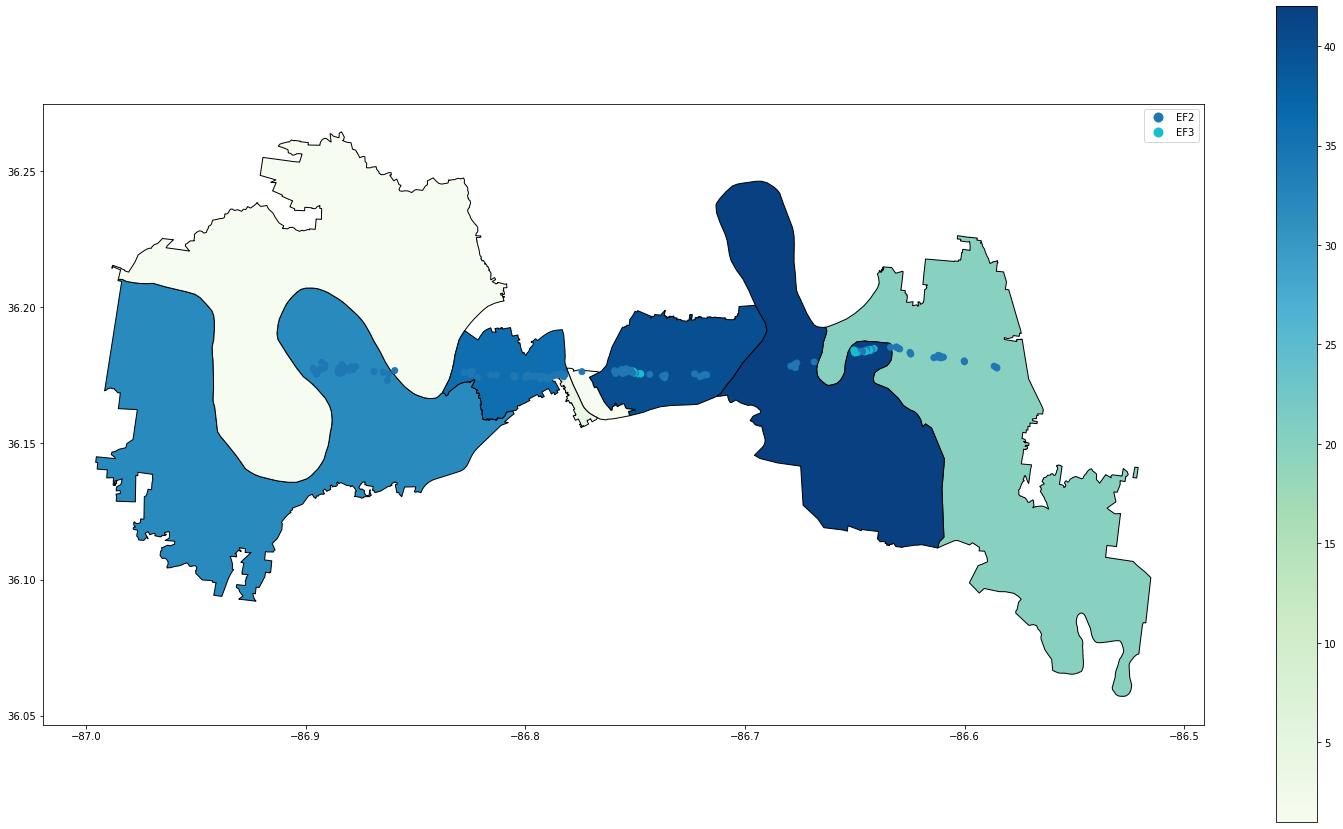

In [91]:
fig, ax = plt.subplots(figsize=(26,15))
tornado_points_zip.plot(column = 'points', 
              cmap = 'GnBu', 
              edgecolor = 'black', 
              legend = True,
              ax = ax)
points_tornado_zone.plot( ax = ax, column = 'EF_Scale', legend = True)
for index, row in zipcodes.iterrows():
    if zipcodes['zip']:
        plt.annotate(text=row['zip'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', fontweight = 'bold')
plt.title('Tornado Points', fontsize = 14);
#ax.axis('off');